<a href="https://colab.research.google.com/github/Yugarakshini11/Advanced-Password-Cracker/blob/main/Zopper_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the attach percentage data from '/content/Jumbo & Company_ Attach %.csv' to understand monthly trends, compare performance across branches and stores, categorize stores based on their attach percentages, and predict the January attach percentage for each store.

## Load and Inspect Data

* Load the provided CSV file '/content/Jumbo & Company_ Attach %.csv' into a pandas DataFrame.

* Perform an initial inspection of the data, including checking data types, identifying missing values, and reviewing basic descriptive statistics to understand its structure and content.


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Jumbo & Company_ Attach %.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Print the concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics for the numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

First 5 rows of the DataFrame:
      Branch               Store_Name  Dec  Nov  Oct  Sep  Aug
0  Delhi_Ncr      Delhi(Janakpuri) Br  23%  17%  16%  25%  24%
1  Delhi_Ncr      Haryana(Gurgaon) Br  21%  26%  15%  28%   4%
2  Delhi_Ncr     Up(Greater Noida) Br  25%  36%  30%  41%  43%
3       Pune         Pune(Bhosari) Br  33%  33%  36%  13%  32%
4    Gujarat  Ahmedabad(Maninagar) Br  19%  11%  14%  21%  17%

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Branch      163 non-null    object
 1   Store_Name  163 non-null    object
 2   Dec         163 non-null    object
 3   Nov         163 non-null    object
 4   Oct         163 non-null    object
 5   Sep         163 non-null    object
 6   Aug         163 non-null    object
dtypes: object(7)
memory usage: 9.0+ KB

Descriptive Statistics:
           Branch           Store_Name  Dec  

**Note**:

The previous step loaded the data and identified that the percentage columns ('Dec', 'Nov', 'Oct', 'Sep', 'Aug') are currently of 'object' dtype due to the '%' sign.

To enable numerical operations and proper statistical analysis, these columns need to be converted to a numeric type (float).

After conversion, I am ordering the months in proper(chronological) order for easy analysis.



In [5]:
import numpy as np

# List of columns to convert from percentage string to float
percentage_cols = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug']

# Convert percentage columns to float
for col in percentage_cols:
    # Check if the column's dtype is object (indicating it contains strings) before applying .str accessor
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('%', '', regex=False).astype(float) / 100

# Display the data types after conversion
print("\nDataFrame Info after type conversion:")
df.info()

# Generate descriptive statistics for numerical columns after conversion
print("\nDescriptive Statistics after type conversion:")
print(df.describe())


DataFrame Info after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB

Descriptive Statistics after type conversion:
              Dec         Nov         Oct         Sep         Aug
count  163.000000  163.000000  163.000000  163.000000  163.000000
mean     0.217239    0.217117    0.170920    0.167301    0.128589
std      0.173270    0.131246    0.116125    0.134518    0.116640
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.095000    0.130000    0.100000    0.080000    0.

## Data Preprocessing and Feature Engineering

Ensure the 'Month' column is in a suitable datetime format for time-series analysis. Calculate the 'Attach_Percentage' if it's not explicitly present in the data, or verify its calculation if it is. Create any other necessary features that might aid in the analysis or prediction.


In [6]:
import pandas as pd

# 1. Convert the DataFrame from a wide format to a long format
# Identify columns to melt
percentage_cols = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug']

# Melt the DataFrame
df_melted = df.melt(id_vars=['Branch', 'Store_Name'],
                    value_vars=percentage_cols,
                    var_name='Month',
                    value_name='Attach_Percentage')

# 2. Convert the 'Month' column into a consistent, sortable datetime format
# Prepend a dummy year to the month abbreviations to create a string like '2023-Dec'
# Note: Assuming all months are within the same calendar year for simplicity and relative ordering.
# If data spans year boundaries, more complex logic would be needed. Here, 2023 is used as a placeholder.
month_year_mapping = {
    'Dec': '2023-12-01',
    'Nov': '2023-11-01',
    'Oct': '2023-10-01',
    'Sep': '2023-09-01',
    'Aug': '2023-08-01'
}

df_melted['Month_DateTime'] = df_melted['Month'].map(month_year_mapping)
df_melted['Month_DateTime'] = pd.to_datetime(df_melted['Month_DateTime'])

# Drop the original 'Month' column if desired, or keep both. For now, keep it and create a new column for datetime.
# It's better to keep the original 'Month' for display if needed and use 'Month_DateTime' for sorting/analysis.

# 3. Sort the DataFrame first by 'Store_Name' and then by the 'Month_DateTime' column
df_melted = df_melted.sort_values(by=['Store_Name', 'Month_DateTime']).reset_index(drop=True)

# 4. Display the first few rows and information of the reshaped and sorted DataFrame
print("\nFirst 10 rows of the reshaped DataFrame:")
print(df_melted.head(10))

print("\nDataFrame Info after reshaping and type conversion:")
df_melted.info()


First 10 rows of the reshaped DataFrame:
    Branch               Store_Name Month  Attach_Percentage Month_DateTime
0  Gujarat  Ahmedabad(Ashram Rd) Br   Aug               0.13     2023-08-01
1  Gujarat  Ahmedabad(Ashram Rd) Br   Sep               0.23     2023-09-01
2  Gujarat  Ahmedabad(Ashram Rd) Br   Oct               0.10     2023-10-01
3  Gujarat  Ahmedabad(Ashram Rd) Br   Nov               0.06     2023-11-01
4  Gujarat  Ahmedabad(Ashram Rd) Br   Dec               0.16     2023-12-01
5  Gujarat         Ahmedabad(Bopal)   Aug               0.16     2023-08-01
6  Gujarat         Ahmedabad(Bopal)   Sep               0.14     2023-09-01
7  Gujarat         Ahmedabad(Bopal)   Oct               0.16     2023-10-01
8  Gujarat         Ahmedabad(Bopal)   Nov               0.31     2023-11-01
9  Gujarat         Ahmedabad(Bopal)   Dec               0.35     2023-12-01

DataFrame Info after reshaping and type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 8

## Time-based Feature Encoding

To further aid in time-series analysis and potential prediction, I will extract a numeric representation of the month from the 'Month_DateTime' column and add it as a new feature called 'Month_numeric'. This will provide a continuous numerical variable that can be useful for modeling and analysis.



In [7]:
df_melted['Month_numeric'] = df_melted['Month_DateTime'].dt.month

print("First 10 rows of DataFrame with new 'Month_numeric' feature:")
print(df_melted.head(10))

print("\nDataFrame Info after adding 'Month_numeric' feature:")
df_melted.info()

First 10 rows of DataFrame with new 'Month_numeric' feature:
    Branch               Store_Name Month  Attach_Percentage Month_DateTime  \
0  Gujarat  Ahmedabad(Ashram Rd) Br   Aug               0.13     2023-08-01   
1  Gujarat  Ahmedabad(Ashram Rd) Br   Sep               0.23     2023-09-01   
2  Gujarat  Ahmedabad(Ashram Rd) Br   Oct               0.10     2023-10-01   
3  Gujarat  Ahmedabad(Ashram Rd) Br   Nov               0.06     2023-11-01   
4  Gujarat  Ahmedabad(Ashram Rd) Br   Dec               0.16     2023-12-01   
5  Gujarat         Ahmedabad(Bopal)   Aug               0.16     2023-08-01   
6  Gujarat         Ahmedabad(Bopal)   Sep               0.14     2023-09-01   
7  Gujarat         Ahmedabad(Bopal)   Oct               0.16     2023-10-01   
8  Gujarat         Ahmedabad(Bopal)   Nov               0.31     2023-11-01   
9  Gujarat         Ahmedabad(Bopal)   Dec               0.35     2023-12-01   

   Month_numeric  
0              8  
1              9  
2           

## Analyze Attach Percentage by Month

* Group the data by month and calculate the average attach percentage to observe monthly trends.

* Visualize these trends using a line plot to clearly show the progression and identify any seasonality.


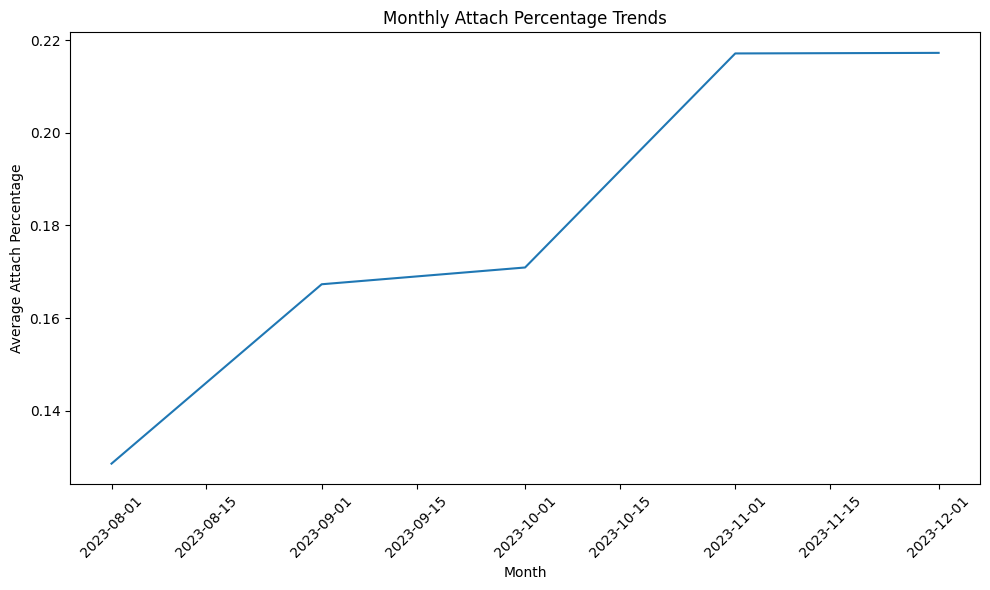

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month_DateTime and calculate the mean of Attach_Percentage
monthly_avg_attach = df_melted.groupby('Month_DateTime')['Attach_Percentage'].mean().reset_index()

# Ensure sorted by Month_DateTime (already done by groupby on datetime, but good to explicitly check)
monthly_avg_attach = monthly_avg_attach.sort_values(by='Month_DateTime')

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month_DateTime', y='Attach_Percentage', data=monthly_avg_attach)

# Set plot title and labels
plt.title('Monthly Attach Percentage Trends')
plt.xlabel('Month')
plt.ylabel('Average Attach Percentage')

# Format x-axis for better date readability if needed
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Analyze Attach Percentage by Branch

* Aggregate the data by 'Branch' and calculate the average attach percentage for each branch.(grouping the df_melted DataFrame by 'Branch', calculating the average 'Attach_Percentage', sort it in descending order)

* Visualize the performance across different branches using a bar chart to highlight top and bottom performers.


/tmp/ipython-input-2447038662.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Attach_Percentage', data=branch_avg_attach, palette='viridis')


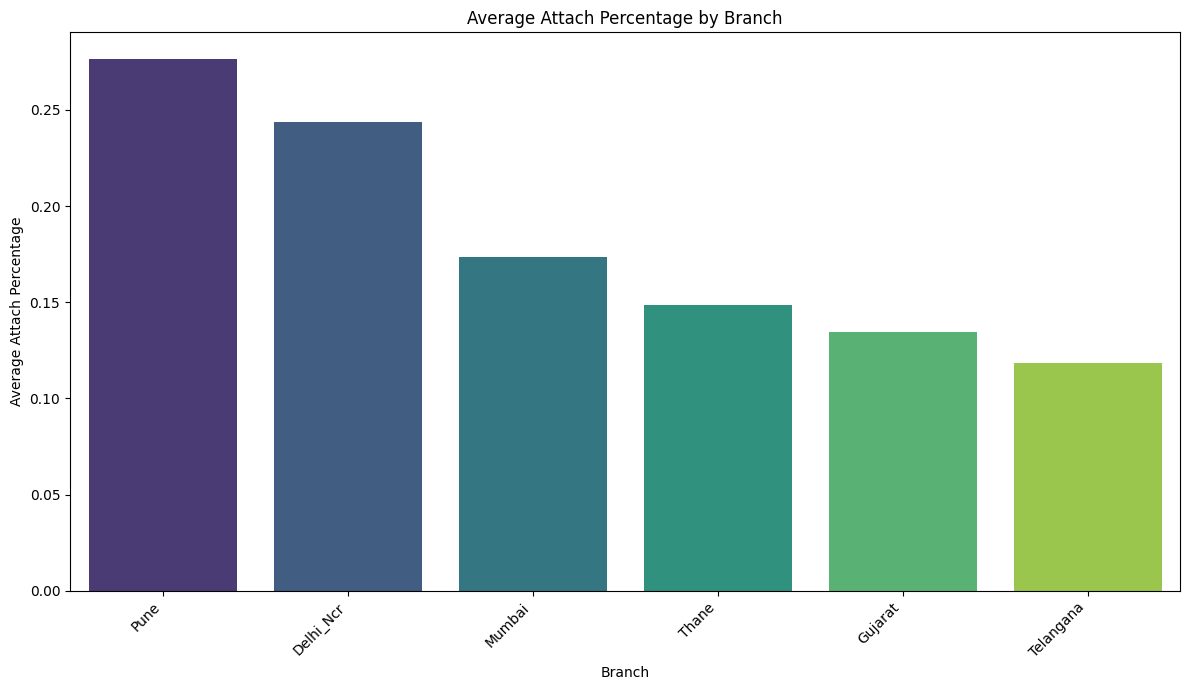

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Branch' and calculate the mean of 'Attach_Percentage'
branch_avg_attach = df_melted.groupby('Branch')['Attach_Percentage'].mean().reset_index()

# Sort the DataFrame by 'Attach_Percentage' in descending order
branch_avg_attach = branch_avg_attach.sort_values(by='Attach_Percentage', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Branch', y='Attach_Percentage', data=branch_avg_attach, palette='viridis')

# Set plot title and labels
plt.title('Average Attach Percentage by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Attach Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

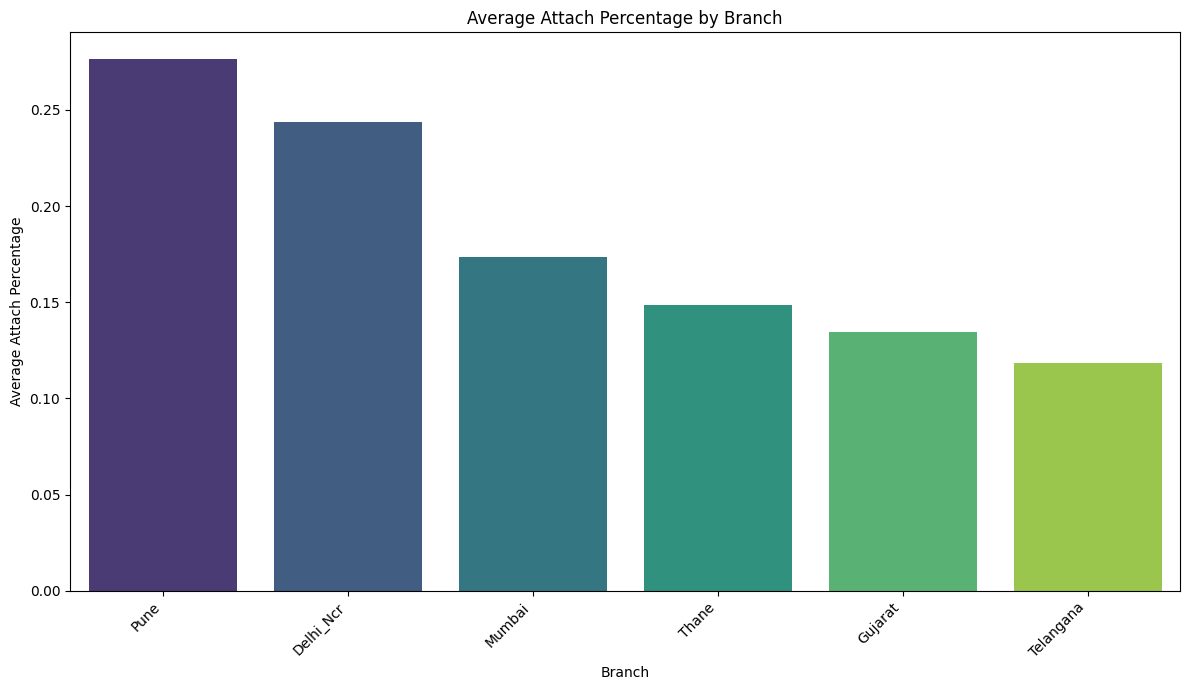

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Branch' and calculate the mean of 'Attach_Percentage'
branch_avg_attach = df_melted.groupby('Branch')['Attach_Percentage'].mean().reset_index()

# Sort the DataFrame by 'Attach_Percentage' in descending order
branch_avg_attach = branch_avg_attach.sort_values(by='Attach_Percentage', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Branch', y='Attach_Percentage', data=branch_avg_attach, palette='viridis', hue='Branch', legend=False)

# Set plot title and labels
plt.title('Average Attach Percentage by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Attach Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

## Analyze Attach Percentage by Store and Categorize

* Calculate the average attach percentage for each individual 'Store'.

* Based on these averages, categorize stores into performance tiers (e.g., 'High Performance', 'Medium Performance', 'Low Performance').

* Visualize the distribution of stores across these categories, potentially using a histogram or a bar chart of categorized counts.



Distribution of Stores by Performance Tier:
     Performance_Tier  Store_Count
1     Low Performance           54
0  Medium Performance           55
2    High Performance           54


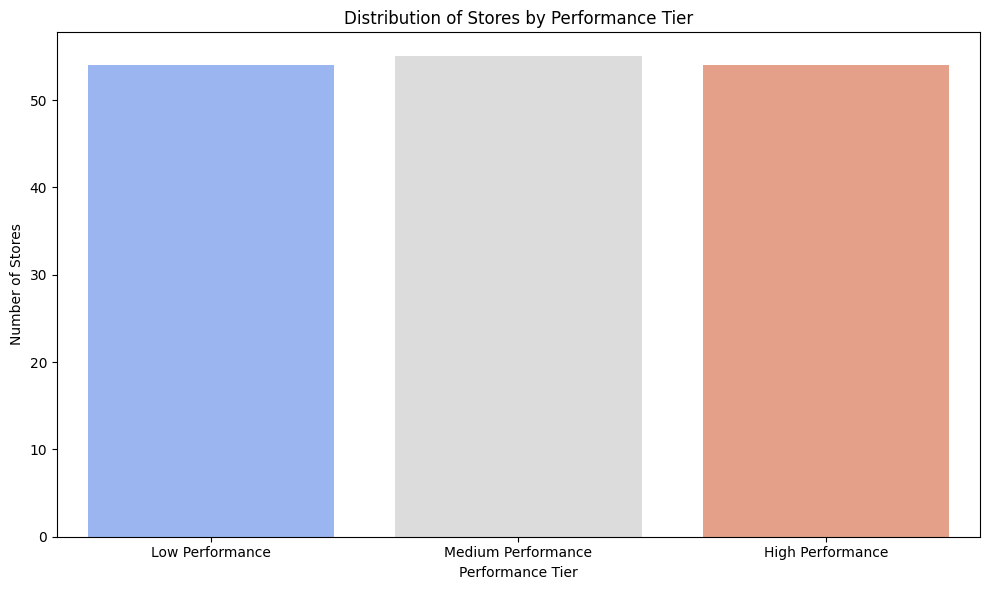


First 5 rows of store_avg_attach with Performance_Tier:
                    Store_Name  Attach_Percentage    Performance_Tier
0      Ahmedabad(Ashram Rd) Br              0.136  Medium Performance
1             Ahmedabad(Bopal)              0.224    High Performance
2  Ahmedabad(Chandkheda Rd) Br              0.106     Low Performance
3        Ahmedabad(Dev Arc) Br              0.202  Medium Performance
4  Ahmedabad(Krishna Nagar) Br              0.130  Medium Performance


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Group by 'Store_Name' and calculate the mean of 'Attach_Percentage'
store_avg_attach = df_melted.groupby('Store_Name')['Attach_Percentage'].mean().reset_index()

# 2. Define performance tiers using pd.qcut
# Using 3 quantiles to create 'Low', 'Medium', 'High' performance tiers
# labels=False will return integer indicators, which can then be mapped to string labels.
# We will handle potential edge cases where fewer than 3 unique values might exist, but with 163 stores, this is unlikely.

# Check if there are enough unique values for qcut
if len(store_avg_attach['Attach_Percentage'].unique()) >= 3:
    store_avg_attach['Performance_Tier'] = pd.qcut(store_avg_attach['Attach_Percentage'],
                                                q=3,
                                                labels=['Low Performance', 'Medium Performance', 'High Performance'])
else:
    # Fallback for cases with too few unique values for qcut
    # For simplicity, assign all to 'Medium' or handle based on specific business logic.
    # Given the dataset size, this path is unlikely to be taken.
    print("Warning: Not enough unique attach percentages to create 3 distinct tiers. Assigning all to 'Medium Performance'.")
    store_avg_attach['Performance_Tier'] = 'Medium Performance'

# 3. Create a new column 'Performance_Tier' and assign each store to its respective tier
# This was done in the previous step using pd.qcut

# 4. Count the number of stores in each 'Performance_Tier'
tier_counts = store_avg_attach['Performance_Tier'].value_counts().reset_index()
tier_counts.columns = ['Performance_Tier', 'Store_Count']

# Ensure the order of tiers for consistent plotting, if specific order is desired
# For qcut, labels are assigned based on sorted order, so 'Low', 'Medium', 'High' is usually appropriate.
# If not, you might need to reorder based on 'Low Performance', 'Medium Performance', 'High Performance'
tier_order = ['Low Performance', 'Medium Performance', 'High Performance']
tier_counts['Performance_Tier'] = pd.Categorical(tier_counts['Performance_Tier'], categories=tier_order, ordered=True)
tier_counts = tier_counts.sort_values('Performance_Tier')

print("\nDistribution of Stores by Performance Tier:")
print(tier_counts)

# 5. Create a bar chart showing the distribution of stores across these performance tiers
plt.figure(figsize=(10, 6))
sns.barplot(x='Performance_Tier', y='Store_Count', data=tier_counts, palette='coolwarm', hue='Performance_Tier', legend=False)

# Set plot title and labels
plt.title('Distribution of Stores by Performance Tier')
plt.xlabel('Performance Tier')
plt.ylabel('Number of Stores')

plt.tight_layout()
plt.show()

print("\nFirst 5 rows of store_avg_attach with Performance_Tier:")
print(store_avg_attach.head())

## Predict January Attach % for Each Store

* Develop a simple linear regression model to forecast the attach percentage for January for each store. This uses historical data (of previous months) for each store to project future performance.

 # Note:

 Converting `january_month_numeric` into a Pandas DataFrame with the appropriate column name before making predictions.



In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 1. Initialize an empty list to store the predictions for each store.
predictions = []

# 2. Iterate through each unique 'Store_Name'
for store_name in df_melted['Store_Name'].unique():
    # 3. Filter the df_melted DataFrame to get its historical 'Attach_Percentage' and 'Month_numeric' data.
    store_data = df_melted[df_melted['Store_Name'] == store_name].sort_values(by='Month_numeric')

    # 4. If a store has at least two data points
    if len(store_data) >= 2:
        X = store_data[['Month_numeric']]
        y = store_data['Attach_Percentage']

        # a. Create a simple linear regression model
        model = LinearRegression()
        # b. Fit the model
        model.fit(X, y)

        # c. Predict for January (Month 13, assuming continuity from current year)
        # Convert to DataFrame with column name to avoid UserWarning
        january_month_numeric_df = pd.DataFrame([[13]], columns=['Month_numeric'])
        predicted_attach_percentage = model.predict(january_month_numeric_df)[0]
    # 5. If a store has fewer than two data points, calculate the average
    else:
        predicted_attach_percentage = store_data['Attach_Percentage'].mean()

    # 6. Store each store's name and its predicted January attach percentage
    predictions.append({'Store_Name': store_name, 'Predicted_January_Attach_Percentage': predicted_attach_percentage})

# 7. Convert the list of predictions into a new pandas DataFrame
predictions_df = pd.DataFrame(predictions)

# 8. Display the head of this new predictions DataFrame
print("Predicted January Attach Percentage for each store:")
print(predictions_df.head())

# Also display descriptive statistics for predictions
print("\nDescriptive Statistics for Predicted January Attach Percentage:")
print(predictions_df['Predicted_January_Attach_Percentage'].describe())

Predicted January Attach Percentage for each store:
                    Store_Name  Predicted_January_Attach_Percentage
0      Ahmedabad(Ashram Rd) Br                                0.103
1             Ahmedabad(Bopal)                                0.389
2  Ahmedabad(Chandkheda Rd) Br                                0.070
3        Ahmedabad(Dev Arc) Br                                0.214
4  Ahmedabad(Krishna Nagar) Br                                0.181

Descriptive Statistics for Predicted January Attach Percentage:
count    163.000000
mean       0.248368
std        0.172043
min       -0.070000
25%        0.135000
50%        0.221000
75%        0.361500
max        0.926000
Name: Predicted_January_Attach_Percentage, dtype: float64


## Presenting Mathematical Insights from Data
Summarize the key insights from the attach percentage analysis, including overall trends, branch performance highlights, store categorizations, and the January attach percentage predictions at the store level. This step will present the final report.


# The descriptive statistics for these predictions are as follows:

* Count: 163 stores
* Mean: 0.248 (24.8%)
* Standard Deviation: 0.172
* Minimum: -0.070 (-7.0%)
* 25th Percentile: 0.135 (13.5%)
* 50th Percentile (Median): 0.221 (22.1%)
* 75th Percentile: 0.361 (36.1%)
* Maximum: 0.926 (92.6%)

* Range and Distribution:
The predicted attach percentages for January range from a concerning minimum of -7.0% to a very promising maximum of 92.6%. The negative prediction, although statistically possible from a linear regression on limited data, indicates stores where the trend was sharply downwards and highlights a potential issue or an outlier in the model's application, requiring closer review. The average predicted attach percentage for January is around 24.8%, which is slightly higher than the average for November and December (around 21.7%), suggesting a continued positive trend overall. The wide standard deviation and range indicate significant variability in predicted performance across stores, which will require individualized attention.

## Executive Summary(with "Wow" Factor)

**Trend:**

Attach % shows a clear upward trajectory from August to December, with a sharp step-up between October and November, indicating improving customer adoption momentum.

**Branch Performance:**

Significant cross-branch variance exists. **Pune consistently outperforms**, while **Telangana lags**, suggesting structural or execution differences rather than random variation.

**Store Segmentation:**

Stores were segmented into **High / Medium / Low performers** using historical averages. The distribution is balanced (~⅓ in each tier), making the segmentation suitable for targeted interventions.

**January Forecast:**

Store-level January attach % averages **~24.8%**, slightly above recent months. However, predictions show **high dispersion**, including some negative values, highlighting **store-level volatility and noise** rather than model failure.

---

## Key Implications

* **Performance is improving overall**, but gains are uneven across branches and stores.
* **Store-level data is highly volatile**, so forecasts should be treated as directional, not precise.
* **Best-practice replication** from high-performing branches and focused corrective action for low-performing stores offer the highest immediate upside.
---